### 2.2 데이터 프레임(DataFrame)

In [24]:
import numpy as np
import pandas as pd

- 생성 방법1
    - 2차원 데이터, 컬럼, 인덱스

In [25]:
df1 = pd.DataFrame(
    np.random.randint(40, 101, 12).reshape(4, 3),       # 2차원 데이터
    columns=list('XYZ'),            # 컬럼명, list('XYZ') ==> ['X','Y','Z']
    index=list('abcd')              # 인덱스
)
df1

X   Y    Z
a  53  40   84
b  98  53   98
c  57  61   93
d  66  44  100

- 생성방법 2
    - 딕셔너리의 리스트

In [26]:
data = [
    {'X':67, 'Y':50, 'Z':45},
    {'X':72, 'Y':88, 'Z':79},
    {'X':71, 'Y':78, 'Z':57},
    {'X':82, 'Y':75, 'Z':98}
]
df2 = pd.DataFrame(data, index=list('avcd'))
df2

X   Y   Z
a  67  50  45
v  72  88  79
c  71  78  57
d  82  75  98

- 생성방법 3
    - 데이터가 value, 컬럼명이 key가 되는 딕셔너리

In [27]:
data = {
    'X': [67, 72, 71, 82],
    'Y': [50, 88, 78, 75],
    'Z': [45, 79, 57, 98]
}
df3 = pd.DataFrame(data, index=list('abcd'))
df3

X   Y   Z
a  67  50  45
b  72  88  79
c  71  78  57
d  82  75  98

- 여러가지 타입이 혼합된 형태의 데이터로 생성

In [28]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

지역     2015     2010     2005     2000  2010-2015 증가율
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141

In [29]:
df.index.name = '도시'
df.columns.name = '항목'
df

항목   지역     2015     2010     2005     2000  2010-2015 증가율
도시                                                        
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141

In [30]:
df.values

array([['수도권', 9904312, 9631482, 9762546, 9853972, 0.0283],
       ['경상권', 3448737, 3393191, 3512547, 3655437, 0.0163],
       ['수도권', 2890451, 2632035, 2517680, 2466338, 0.0982],
       ['경상권', 2466052, 2431774, 2456016, 2473990, 0.0141]], dtype=object)

In [31]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object', name='항목')

In [32]:
df.index

Index(['서울', '부산', '인천', '대구'], dtype='object', name='도시')

- 연습문제 4.1.2

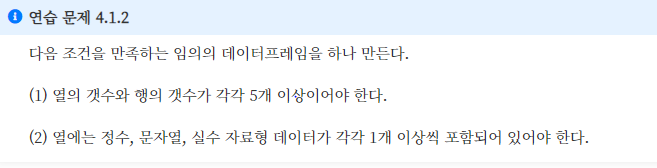

In [33]:
data = []
for i in range(5):
    d = {
        '문자열': chr(np.random.randint(65, 91)) + chr(np.random.randint(65, 91)),
        '정수1': np.random.randint(1, 7),
        '정수2': np.random.randint(40, 101),
        '정수3': np.random.randint(1, 100) * 1000,
        '실수':round(np.random.random(), 4)
    }
    data.append(d)
df4 = pd.DataFrame(data, index=list('vwxyz'))
df4

문자열  정수1  정수2    정수3      실수
v  ED    1   87  23000  0.3123
w  JH    5  100  89000  0.6406
x  RH    1   88   4000  0.5165
y  HX    6   58  13000  0.4639
z  PK    1   85  67000  0.5626

In [34]:
data5 = {
    'A': [1, 2, 3, 4, 5],
    'B': ['아','야','어','여','우'],
    'C': [0.1, 0.2, 0.3, 0.4, 0.5],
    'D': [123, 456, 789, 1098, 765],
    'E': ['하','햐','허','혀','후']
}
df8 = pd.DataFrame(data5, index=list('mnbjf'))      #
df8

A  B    C     D  E
m  1  아  0.1   123  하
n  2  야  0.2   456  햐
b  3  어  0.3   789  허
j  4  여  0.4  1098  혀
f  5  우  0.5   765  후

- 전치(Transpose)

In [55]:
df4.T

v       w       x       y       z
문자열      ED      JH      RH      HX      PK
정수1       1       5       1       6       1
정수2      87     100      88      58      85
정수3   23000   89000    4000   13000   67000
실수   0.3123  0.6406  0.5165  0.4639  0.5626

- 열 데이터의 갱신, 추가

In [36]:
df

항목   지역     2015     2010     2005     2000  2010-2015 증가율
도시                                                        
서울  수도권  9904312  9631482  9762546  9853972         0.0283
부산  경상권  3448737  3393191  3512547  3655437         0.0163
인천  수도권  2890451  2632035  2517680  2466338         0.0982
대구  경상권  2466052  2431774  2456016  2473990         0.0141

In [37]:
df['2010-2015 증가율'] = df['2010-2015 증가율'] * 100
df

항목   지역     2015     2010     2005     2000  2010-2015 증가율
도시                                                        
서울  수도권  9904312  9631482  9762546  9853972           2.83
부산  경상권  3448737  3393191  3512547  3655437           1.63
인천  수도권  2890451  2632035  2517680  2466338           9.82
대구  경상권  2466052  2431774  2456016  2473990           1.41

In [38]:
# 열 이름이 있으면 갱신, 없으면 추가
df['Eng name'] = ['Seoul', 'Busan', 'Incheon', 'Daegu']
df

항목   지역     2015     2010     2005     2000  2010-2015 증가율 Eng name
도시                                                                 
서울  수도권  9904312  9631482  9762546  9853972           2.83    Seoul
부산  경상권  3448737  3393191  3512547  3655437           1.63    Busan
인천  수도권  2890451  2632035  2517680  2466338           9.82  Incheon
대구  경상권  2466052  2431774  2456016  2473990           1.41    Daegu

- 열 삭제

In [39]:
del df['2000']

In [40]:
df.drop(columns=['2005','2010'], inplace=True)
df

항목   지역     2015  2010-2015 증가율 Eng name
도시                                      
서울  수도권  9904312           2.83    Seoul
부산  경상권  3448737           1.63    Busan
인천  수도권  2890451           9.82  Incheon
대구  경상권  2466052           1.41    Daegu

In [41]:
# 행을 지울 때
df.drop(['대구'], inplace=True)
df

항목   지역     2015  2010-2015 증가율 Eng name
도시                                      
서울  수도권  9904312           2.83    Seoul
부산  경상권  3448737           1.63    Busan
인천  수도권  2890451           9.82  Incheon

In [42]:
# 열 이름을 하나만 선택하면 시리즈 반환
df['지역']

도시
서울    수도권
부산    경상권
인천    수도권
Name: 지역, dtype: object

In [43]:
# 열 이름이 리스트로 감싸져 있으면 데이터프레임 반환
df[['지역']]

항목   지역
도시     
서울  수도권
부산  경상권
인천  수도권

- 개별 인덱싱

In [44]:
# 데이터프레임[열 이름][행 인덱스]
df['지역']['서울'],df['지역'].서울, df.지역['서울'], df.지역.서울

('수도권', '수도권', '수도권', '수도권')

In [45]:
# 컬럼명이 숫자로 시작하거나 공백이 있는 경우에는. 컬럼명을 사용할 수 없음
df.2015['서울']

SyntaxError: invalid syntax (3060927605.py, line 2)

- 연습문제 4.1.3

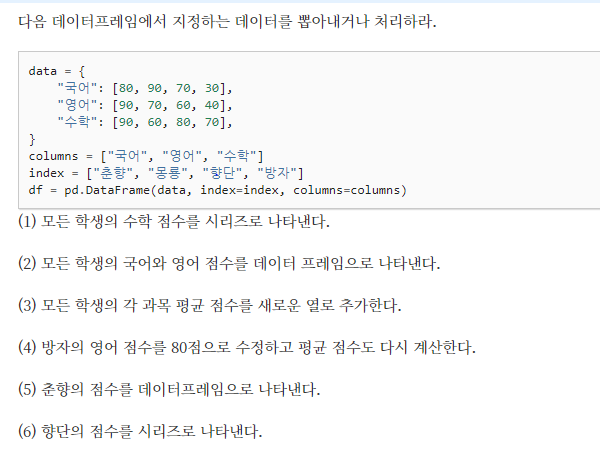

In [62]:
data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
df = pd.DataFrame(data, index=index, columns=columns)

In [47]:
#(1) 모든 학생의 수학 점수를 시리즈로 나타낸다.
df['수학']

춘향    90
몽룡    60
향단    80
방자    70
Name: 수학, dtype: int64

In [48]:
#(2) 모든 학생의 국어와 영어 점수를 데이터 프레임으로 나타낸다.

df[['국어','영어']]


국어  영어
춘향  80  90
몽룡  90  70
향단  70  60
방자  30  40

In [60]:
#(3) 모든 학생의 각 과목 평균 점수를 새로운 열로 추가한다.
df.mean(axis='columns')
df['평균점수'] = round(df.mean(axis='columns'))
df



국어  영어  수학    평균  평균점수
춘향  80  90  90  86.7  87.0
몽룡  90  70  60  73.3  73.0
향단  70  60  80  70.0  70.0
방자  30  40  70  46.7  47.0

In [63]:
#센세 풀이
df['평균'] = (df.sum(axis=1) / len(df.columns)).round(1)
# (df.국어 + df.영어 + df.수학) / 3
df

국어  영어  수학    평균
춘향  80  90  90  86.7
몽룡  90  70  60  73.3
향단  70  60  80  70.0
방자  30  40  70  46.7

In [50]:
#(4) 방자의 영어 점수를 80점으로 수정하고 평균 점수도 다시 계산한다.

df['영어'] =[90, 70, 60, 80]
df

국어  영어  수학  평균점수
춘향  80  90  90  87.0
몽룡  90  70  60  73.0
향단  70  60  80  70.0
방자  30  80  70  47.0

In [65]:
# 센세 풀이
import warnings
warnings.filterwarnings('ignore')
del df['평균']
df['영어']['방자'] = 80
df['평균'] = (df.sum(axis=1) / len(df.columns)).round(1)
df

국어  영어  수학    평균
춘향  80  90  90  86.7
몽룡  90  70  60  73.3
향단  70  60  80  70.0
방자  30  80  70  60.0

In [66]:
#(5) 춘향의 점수를 데이터프레임으로 나타낸다.
df[:1]

국어  영어  수학    평균
춘향  80  90  90  86.7

In [71]:
#센세풀이
df['춘향':'춘향']

국어  영어  수학    평균
춘향  80  90  90  86.7

In [68]:
# 센세풀이
df.loc[['춘향']]

국어  영어  수학    평균
춘향  80  90  90  86.7

In [70]:
#센세풀이
df.T[['춘향']].T

국어    영어    수학    평균
춘향  80.0  90.0  90.0  86.7

In [67]:
#(6) 향단의 점수를 시리즈로 나타낸다.
df.T['향단']

국어    70.0
영어    60.0
수학    80.0
평균    70.0
Name: 향단, dtype: float64